In [1]:
import matplotlib.pyplot as plt # import plotting package 
import pandas as pd
import numpy as np
# render plotting automatically 
%matplotlib inline 

import matplotlib as mpl # more plotting finctionality 

mpl.rcParams['figure.dpi'] = 400 # high resolution figures 

In [2]:
# import the data 
df_clean_2 = pd.read_csv('data/default_of_clients_cleaned')
df_clean_2.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,798fc410-45c1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,85698822-43f5,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,0737c11b-be42,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# changes the text describing the chart
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187BA4379E8>,
      dtype=object)

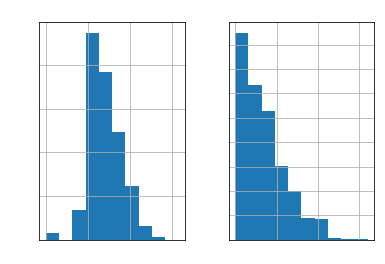

In [4]:
# age data and credit limit are graphed on a histogram  
# graph the data in a histogram 
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [5]:
# showing stats(frequencies) for age and credit card limit
# most people are around the age 25-30 
# most people have a credit card limit that is lower  
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26979.000000,26979.000000
mean,165958.474369,35.090663
std,130333.534550,9.934731
min,0.000000,0.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


Data Dictionary for value_counts in EDUCATION 
1 - graduate school
2 - university
3 - highschool
4,5,6 - others

In [6]:
# need to look at the categorical featurers use value_counts
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
0      326
5      245
4      115
6       43
Name: EDUCATION, dtype: int64

In [7]:
# show value_counts of MARRIAGE
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
0      363
3      286
Name: MARRIAGE, dtype: int64

In [8]:
# changes the values of 0 in MARRIAGE feature to 3 
# 1 married, 2 single, 3 other
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      649
Name: MARRIAGE, dtype: int64

In [9]:
# ML algorithms only work with numbers 
# categorical features need to be mapped to numbers 1, 2, 3, 4
# this assignment of categories is called ordinal features
# df_clean_2['AGE'].hist()

Text(0.5, 0, 'Education Level: ordinal encoding')

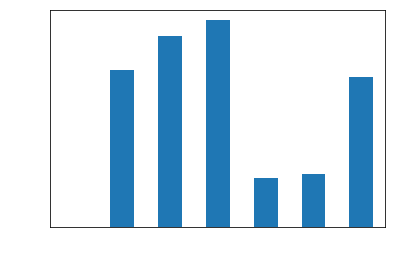

In [10]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month': 'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education Level: ordinal encoding')

Process: Graph specific parts(features) of the data using bar charts or histograms
If the data is graphed in a linear straight line relationship between features and response, then linear regression would be best
Or any type of simple predicting algorithm like logistic regression

Looking above: straight-line fit would not describe the data that well
Since the feature graphed is not linear, it would be better to graph the algorithm using a decision tree or random forest 

This all has to do with turning categorical data for features into ordinal data so it can be processed in a machine learnig algorithm

In [11]:
# Avoid Ordinal Encoding using One-Hot-Encoding
# Reverse engineer EDUCATION feature- obtain text labels that show the different education levels 
# Use pandas to create and OHE 

In [12]:
df_clean_2['EDUCATION_CAT'] = 'none'
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [13]:
cat_mapping ={
    1 : "graduate school",
    2 : "university",
    3 : "highschool",
    4 : "others"
}

In [14]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,highschool
9,3,highschool


In [15]:
# Creates a one-hot Encoded  DataFrame of the EDUCATION_CAT column
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,highschool,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [16]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
            'highschool', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,highschool,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,highschool,0,1,0,0
9,highschool,0,1,0,0


Exploring Financial History in the Dataset

In [17]:
df = pd.read_csv('data/default_of_clients_cleaned')
df.head(10)

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,798fc410-45c1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,85698822-43f5,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,0737c11b-be42,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,5,ceae2946-47e4,50000,1,1,2,37,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,6,d3b8ce26-9c89,500000,1,1,2,29,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,7,d6e1911b-54d0,100000,2,2,2,23,0,-1,-1,...,221,-159,567,380,601,0,581,1687,1542,0
8,8,8421d3b3-2b54,140000,2,3,1,28,0,0,2,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,9,62a2fd79-cd90,20000,1,3,2,35,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [18]:
df.columns

Index(['Unnamed: 0', 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [19]:
df.shape

(26979, 26)

In [20]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [21]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000
mean,-0.017569,-0.131806,-0.165721,-0.222395,-0.266615,-0.290152
std,1.120173,1.191708,1.192280,1.161310,1.125481,1.143929
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [22]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13402
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

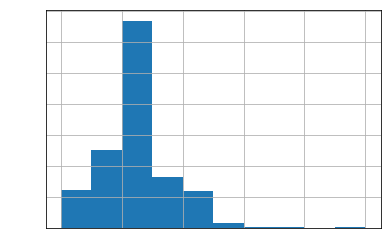

In [23]:
# histogram is a way to get visual interpreation of the information
# we would get from the table of value counts
df[pay_feats[0]].hist()

In [24]:
# We need more control over plot appearance, so we can specify bin edge locations
# create an array of 12 numbers = 11 bins 
# each one of these bins is centered around one of the unique values of PAY_1
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of Accounts')

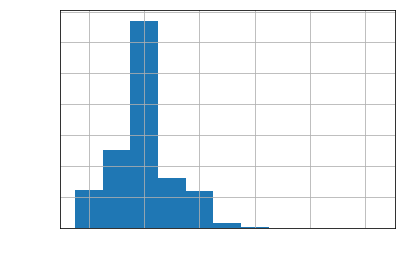

In [25]:
# adds x and y labels to the plot
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of Accounts')

This graph shows that most people default on their credit card payments around the first month where PAY_1 = 1. The people who default later on in the months tend to gradually decrease. Makes sense since people usually sstart paying off there money

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187BAAE8C50>,
      dtype=object)

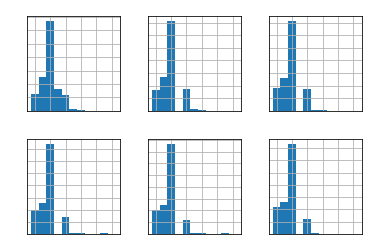

In [26]:
# Use pandas to plot multiple histograms together and visualize the payment status features
# for the last six months of the data set

mpl.rcParams['font.size'] = 4 # determines the fontsize 
# our histograms will be a 2 by 3 grid
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3)) # set bins to pandas series pay_1_bins

In [27]:
df.loc[df['PAY_2'] == 2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


Activity 1: Exploring Remaining Financial Features in the Dataset In this activity, you will examine the remaining financial features in a similar way to how we examined PAY_1, PAY_2, PAY_3, and so on. In order to better visualize some of these data, we'll use a mathematical function that should be familiar: the logarithm. You'll use pandas to apply, which serves to apply any function to an entire column or DataFrame in the process. Once you complete the activity, you should have the following set of histograms of logarithmic transformations of non-zero payments

In [28]:
df.head(10)

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,798fc410-45c1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,85698822-43f5,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,0737c11b-be42,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,5,ceae2946-47e4,50000,1,1,2,37,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,6,d3b8ce26-9c89,500000,1,1,2,29,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,7,d6e1911b-54d0,100000,2,2,2,23,0,-1,-1,...,221,-159,567,380,601,0,581,1687,1542,0
8,8,8421d3b3-2b54,140000,2,3,1,28,0,0,2,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,9,62a2fd79-cd90,20000,1,3,2,35,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [29]:
# list of feature names for pay_amt in data frame 
pay_amt = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [31]:
# describes statistical summaries of the pay amount features
df[pay_amt].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26979.000000,2.697900e+04,26979.000000,26979.000000,26979.000000,26979.000000
mean,5637.486304,5.812443e+03,5198.106194,4829.988769,4787.175803,5196.453797
std,16612.924086,2.109956e+04,17173.642847,15871.606075,15230.958680,17541.304126
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,827.000000,6.940000e+02,363.000000,209.000000,155.000000,5.000000
50%,2091.000000,2.000000e+03,1791.000000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4500.000000,4000.000000,4003.000000,4000.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187C0D3FF28>,
      dtype=object)

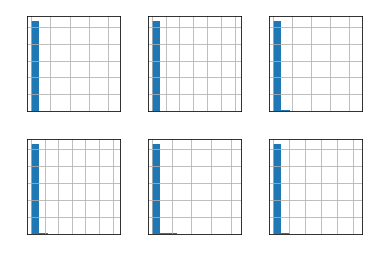

In [84]:
# visualize the pay amount features using a 2 by 3 grid of historgram plots
mpl.rcParams['font.size'] = 4
pay_2_bins = pay_2_bins = np.array(range(-2,18)) - 0.5
df[pay_amt].hist(layout=(2,3), xrot=30) # set bins to pandas series pay_1_bins

In [36]:
bill_amt = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

In [37]:
df[bill_amt].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000
mean,50805.530375,48724.387116,46477.272360,42832.880537,39867.158790,38435.803996
std,73410.538675,70717.795900,68489.634181,64068.282338,60505.864984,59232.062399
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3230.000000,2658.500000,2381.500000,2008.500000,1496.000000,1052.000000
50%,21523.000000,20523.000000,19701.000000,18703.000000,17741.000000,16560.000000
75%,66636.000000,63350.500000,59628.500000,53678.000000,49788.000000,48804.000000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187C0EE9668>,
      dtype=object)

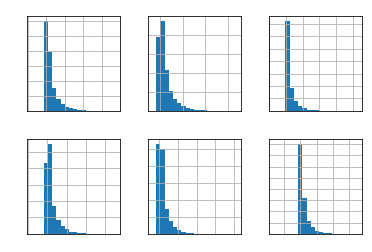

In [87]:
mpl.rcParams['font.size'] = 4
df[bill_amt].hist(bins=20, layout=(2, 3))

In [54]:
# create a boolean mask to see what payments in the data are equak to 0
equals_0 = df[pay_amt] == 0
equals_0.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [55]:
# equals_0 = equals_0 == True
equals_0.any()

PAY_AMT1    True
PAY_AMT2    True
PAY_AMT3    True
PAY_AMT4    True
PAY_AMT5    True
PAY_AMT6    True
dtype: bool

In [56]:
equals_0.describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26979,26979,26979,26979,26979,26979
unique,2,2,2,2,2,2
top,False,False,False,False,False,False
freq,22008,21831,21371,20967,20683,20291


In [88]:
equals_0.sum()

PAY_AMT1    4971
PAY_AMT2    5148
PAY_AMT3    5608
PAY_AMT4    6012
PAY_AMT5    6296
PAY_AMT6    6688
dtype: int64

In [65]:
# mask = ~(df[pay_amt] == 0).all(axis=1)

In [79]:
# mask

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

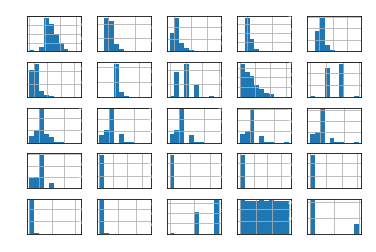

In [78]:
# df.hist().apply(np.log10())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187C289ECC0>,
      dtype=object)

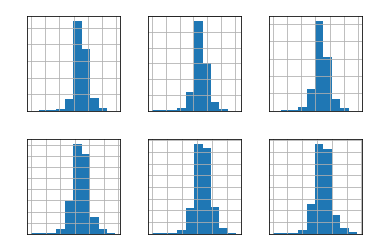

In [90]:
df[pay_amt][~equals_0].apply(np.log10).hist(layout=(2,3))